Emotion classificaion

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/chukk/Desktop/emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [3]:
df.shape

(16000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
df.isna().sum()

text     0
label    0
dtype: int64

In [6]:
df.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

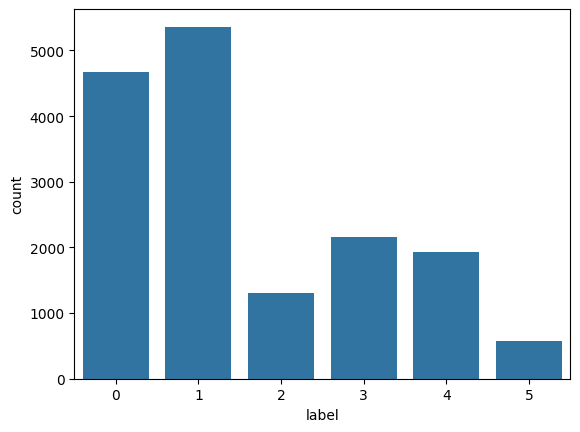

In [7]:
import seaborn as sns
sns.countplot(x=df.label)

In [8]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower()for x in x.split()))

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chukk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [11]:
!pip install textblob


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text'].head()

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: text, dtype: object

In [13]:
x = df[['text']]
y = df['label']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12800, 1)
(3200, 1)
(12800,)
(3200,)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
xtrain_tfidf = tf.fit_transform(x_train['text'])
xtest_tfidf = tf.transform(x_test['text'])

In [17]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
pclf = PassiveAggressiveClassifier()
pclf.fit(xtrain_tfidf,y_train)
pred = pclf.predict(xtest_tfidf)
print(metrics.classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       924
           1       0.89      0.91      0.90      1115
           2       0.76      0.71      0.74       263
           3       0.85      0.83      0.84       379
           4       0.83      0.82      0.82       402
           5       0.78      0.72      0.75       117

    accuracy                           0.86      3200
   macro avg       0.83      0.82      0.82      3200
weighted avg       0.86      0.86      0.86      3200

